In [95]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import time
import json
import os 
import shap

import matplotlib.pyplot as plt 


In [96]:
#df = pd.read_csv('full.csv')
df = pd.read_csv('full_b_drop.csv')
df = df.fillna(0)

df = df[df["Res."] != "D"]

for column in df:
    df[column] = df[column].astype(str)
    df[column] = label.fit_transform(df[column]) 
    

In [99]:
df.head()

,Date,Opponent,Res.,Decision,Rnd,Time,Event,fullName,total_fights,total_fights_bin,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,R_odds,R_ev
0,1207,8005,0,8,3,353,12446,512,13,0,...,0,0,0,0,0,0,0,0,202,0
1,1160,8620,0,24,1,188,11836,512,13,1,...,0,0,0,0,0,0,0,0,202,0
2,2576,13310,0,86,2,0,6352,541,19,0,...,0,0,0,0,0,0,0,0,202,0
3,1699,10964,1,12,1,136,13993,541,19,0,...,0,0,0,0,0,0,0,0,202,0
4,1491,8971,0,19,1,275,3681,541,19,0,...,0,0,0,0,0,0,0,0,202,0


In [100]:
X = df.loc[:, ~df.columns.isin(['Res.'])]
Y = df.loc[:, 'Res.']

# Training and Testing data
seed = 7
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [101]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
score = xgbr.score(X_train, y_train) 
score

0.5831330803055548

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.round(y_pred )))



              precision    recall  f1-score   support

           0       0.72      0.52      0.61      5234
           1       0.81      0.91      0.86     11866

    accuracy                           0.79     17100
   macro avg       0.77      0.72      0.73     17100
weighted avg       0.78      0.79      0.78     17100



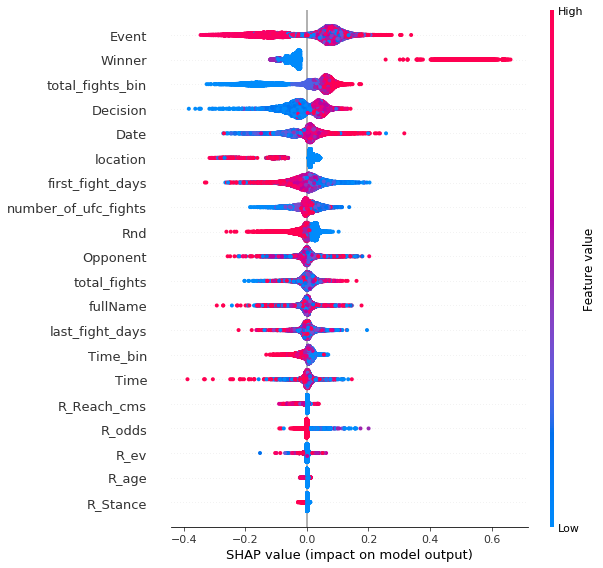

In [111]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
plot = shap.summary_plot(shap_values,X_test)

In [28]:
# 0 = L 
# 1 = W

df

,Res.,total_fights,total_fights_bin,number_of_ufc_fights,number_of_ufc_fights_bin,first_fight_days,last_fight_days,first_bin,last_bin,Time_bin,...,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,0,2,1,1,1,5907,5816,1,1,2.0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,2,1,2,5907,5816,2,2,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,1,18,1,9905,3422,1,1,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,25,1,18,1,9905,3422,1,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0,25,1,18,1,9905,3422,1,1,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20455,0,15,4,2,4,4486,69,4,4,1.0,...,0,0,0,0,0,0,0,0,0,0
20456,0,15,4,2,4,4486,69,4,4,5.0,...,0,0,0,0,0,0,0,0,0,0
20457,1,15,5,2,5,4486,69,5,5,NaN,...,0,0,0,0,0,0,0,0,0,0
20458,1,15,5,2,5,4486,69,5,5,2.0,...,0,0,0,0,0,0,0,0,0,0
